[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/backpropvisualization/blob/master/backpropvisualization.ipynb)

In [1]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
 !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
 !apt-get update -qq 2>&1 > /dev/null
 !apt-get -y install -qq google-drive-ocamlfuse fuse
 from google.colab import auth
 auth.authenticate_user()
 from oauth2client.client import GoogleCredentials
 creds = GoogleCredentials.get_application_default()
 import getpass
 !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
 vcode = getpass.getpass()
 !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive


In [3]:
!pip install torch
!pip install torchvision
!pip install pillow==4.0.0

    100% |████████████████████████████████| 519.5MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5606c6880000 @  0x7f01452971c4 0x56066db2d0d8 0x56066dc16d5d 0x56066db4077a 0x56066db45462 0x56066db3db3a 0x56066db4582e 0x56066db3db3a 0x56066db4582e 0x56066db3db3a 0x56066db4582e 0x56066db3db3a 0x56066db45e1f 0x56066db3db3a 0x56066db4582e 0x56066db3db3a 0x56066db4582e 0x56066db45462 0x56066db45462 0x56066db3db3a 0x56066db45e1f 0x56066db45462 0x56066db3db3a 0x56066db45e1f 0x56066db3db3a 0x56066db45e1f 0x56066db3db3a 0x56066db4582e 0x56066db3db3a 0x56066db6e50f 0x56066db69202
    100% |████████████████████████████████| 61kB 3.6MB/s 
    100% |████████████████████████████████| 2.0MB 7.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    98% |███████████████████████████████▋| 5.5MB 18.6MB/s eta 0:00:01

    100% |████████████████████████████████| 5.6MB 4.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms,models
from PIL import Image

In [0]:

mean=torch.Tensor([0.485, 0.456, 0.406])
std=torch.Tensor([0.229, 0.224, 0.225])


def transformimage(image):
  transform=transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(mean,std)])
  transformedimage=transform(image)
  transformedimage=transformedimage.unsqueeze(0)
  return transformedimage
  
untransform=transforms.ToPILImage()
grayscale=transforms.Grayscale()
def showimage(transformedimage,show,gradient):
    untrans_image=transformedimage.squeeze(0)
    if show==True:
       for i in range(untrans_image.shape[0]):
           untrans_image[i]=(untrans_image[i]*std[i])+mean[i]
    elif gradient==True:
         untrans_image=(untrans_image-untrans_image.min())/untrans_image.max()
    untrans_image=untransform(untrans_image)
    plt.figure()
    plt.imshow(untrans_image)
    plt.show()
    return untrans_image


def grayscale(image):
   image=image.squeeze(0)
   image_mean=torch.mean(image,dim=0)
   plt.figure()
   plt.imshow(image_mean)
   plt.figure()
  
def saliency_map(image):
   image=image.squeeze(0)
   image_max=torch.max(image,dim=0)
   plt.figure()
   plt.imshow(image_max[0])
   plt.figure()
   
def saliencypos_map(image):
   image=image.squeeze(0)
   image_pos=np.maximum(0,image)/image.max()
   plt.figure()
   plt.imshow(untransform(image_pos))
   plt.figure()
  
def saliencyneg_map(image):
   image=image.squeeze(0)
   image_pos=np.maximum(0,-image)/-image.min()
   plt.figure()
   plt.imshow(untransform(image_pos))
   plt.figure()

In [3]:
listofimages=[['drive/app/goldfish.jpg',1],
              ['drive/app/hamster.jpg',333],
              ['drive/app/jellyfish.jpg',107]]
index=0
imgpath=listofimages[index][0]
classid=listofimages[index][1]
model=models.vgg19(pretrained=True)
image=Image.open(imgpath)
imagetensor=transformimage(image)
model.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

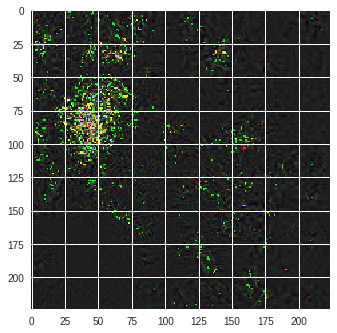

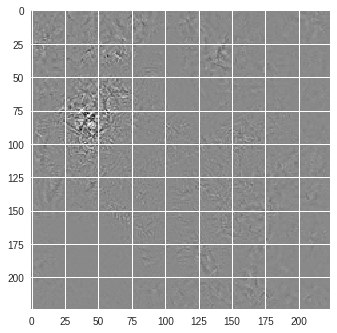

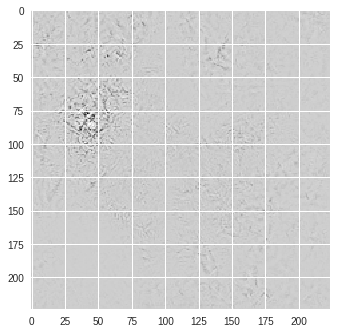

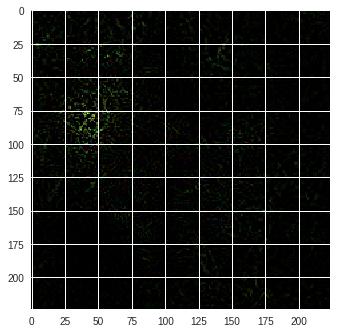

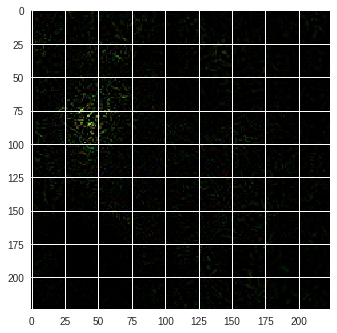

In [4]:
def imagevaluation(imageten):
    
    model.zero_grad()
    output=model(imageten)
    gradient=torch.zeros_like(output)
    gradient[0][classid]=1
    output.backward(gradient)
    return imageten.grad.data
imagetensor.requires_grad=True
image1=imagevaluation(imagetensor)
image=showimage(image1,False,True)
grayscale(image1)
saliency_map(image1)
saliencypos_map(image1)
saliencyneg_map(image1)

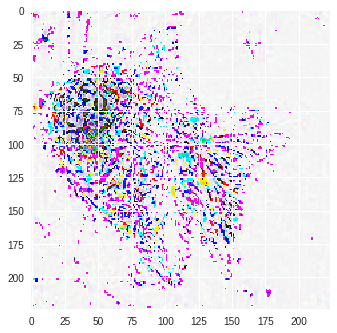

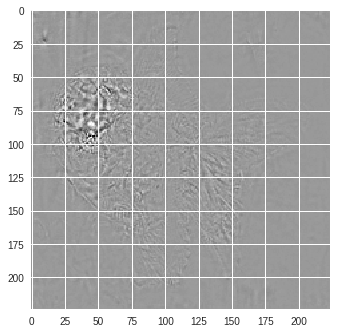

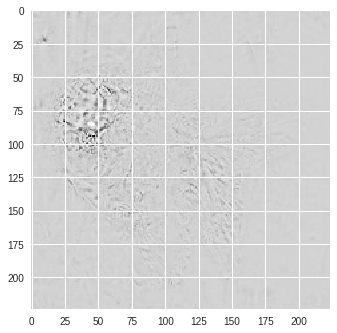

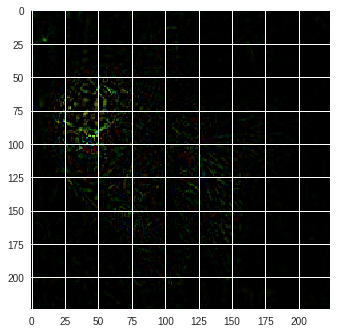

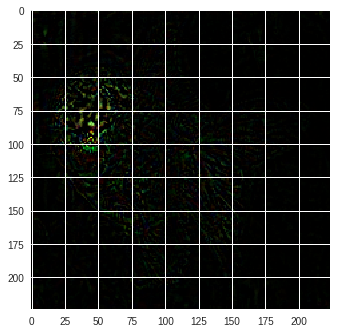

In [6]:

def smoothgrad(imagetensor):
     gradsum=torch.zeros(imagetensor.size())
     for i in range(70):
         imagetensor.requires_grad=False
         noise_img=np.random.normal(0,0.08,imagetensor.size())
         noise_img=torch.from_numpy(noise_img).float()
         new_image=noise_img+imagetensor
         new_image.requires_grad=True
         gradsum+=imagevaluation(new_image)
     gradsum/=70
     return gradsum

smgrad=smoothgrad(imagetensor)
image=showimage(smgrad,False,True)
grayscale(smgrad)
saliency_map(smgrad)
saliencypos_map(smgrad)
saliencyneg_map(smgrad)